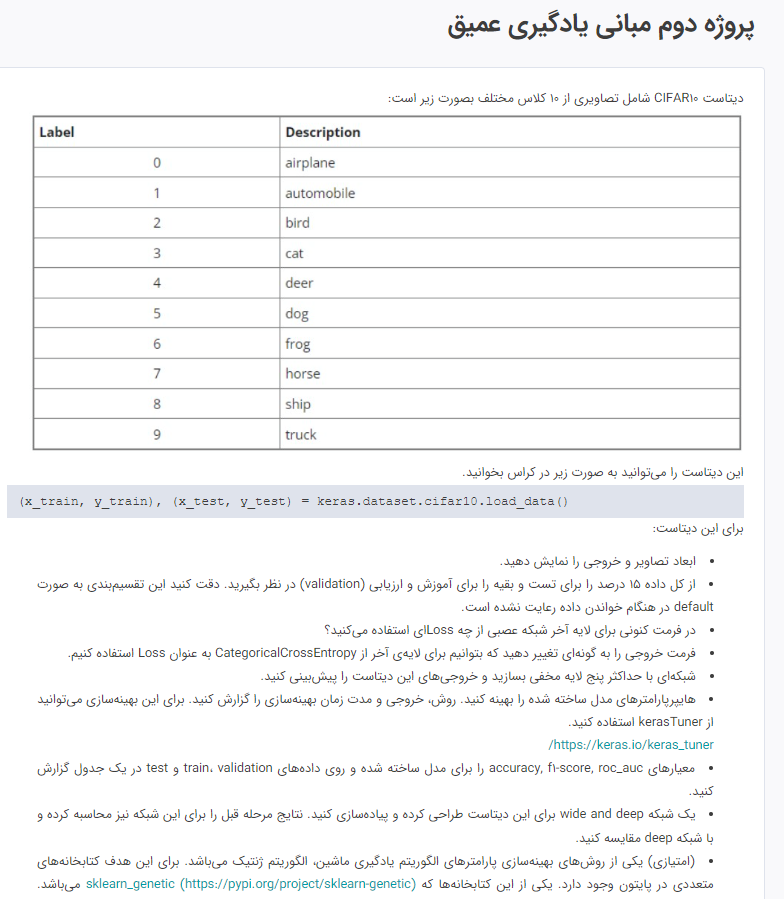

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
# بارگذاری داده‌ها
(x_data, y_data), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# نمایش ابعاد تصاویر و خروجی‌ها
print(f'ابعاد تصاویر: {x_data.shape}')
print(f'ابعاد خروجی‌ها: {y_data.shape}')

ابعاد تصاویر: (50000, 32, 32, 3)
ابعاد خروجی‌ها: (50000, 1)


In [ ]:
# تقسیم داده‌ها به آموزش و تست
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

In [ ]:
# نرمال‌سازی داده‌ها
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# تبدیل برچسب‌ها به دسته‌های (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# ساخت مدل
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))

    # کامپایل کردن مدل
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_model()

# آموزش مدل
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))



Epoch 1/10
1329/1329 [==============================] - 62s 43ms/step - loss: 1.7770 - accuracy: 0.3367 - val_loss: 1.3941 - val_accuracy: 0.4929
Epoch 2/10
1329/1329 [==============================] - 54s 41ms/step - loss: 1.4490 - accuracy: 0.4773 - val_loss: 1.2725 - val_accuracy: 0.5472
Epoch 3/10
1329/1329 [==============================] - 53s 40ms/step - loss: 1.3087 - accuracy: 0.5358 - val_loss: 1.1455 - val_accuracy: 0.5916
Epoch 4/10
1329/1329 [==============================] - 55s 41ms/step - loss: 1.2178 - accuracy: 0.5712 - val_loss: 1.0965 - val_accuracy: 0.6144
Epoch 5/10
1329/1329 [==============================] - 55s 41ms/step - loss: 1.1478 - accuracy: 0.5992 - val_loss: 1.0583 - val_accuracy: 0.6223
Epoch 6/10
1329/1329 [==============================] - 53s 40ms/step - loss: 1.0897 - accuracy: 0.6165 - val_loss: 0.9855 - val_accuracy: 0.6527
Epoch 7/10
1329/1329 [==============================] - 53s 40ms/step - loss: 1.0398 - accuracy: 0.6360 - val_loss: 0.9871 -

In [ ]:
# ارزیابی مدل
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 5s 15ms/step - loss: 1.0008 - accuracy: 0.6593
Test accuracy: 0.6593000292778015


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
# استفاده از داده‌های کوچکتر برای بهینه‌سازی
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]
x_val_small = x_val[:2000]
y_val_small = y_val[:2000]

# تعریف تابع ساخت مدل
def model_builder(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(hp.Int('conv_1_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(hp.Int('conv_2_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(hp.Int('conv_3_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# تنظیم Keras Tuner با RandomSearch و محدودیت تعداد تریال‌ها
tuner = kt.RandomSearch(model_builder,
                        objective='val_accuracy',
                        max_trials=10,  # محدودیت تعداد تریال‌ها
                        directory='my_dir',
                        project_name='intro_to_kt')

# اجرای جستجو برای بهینه‌سازی هایپرپارامترها
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tuner.search(x_train_small, y_train_small, epochs=10, validation_data=(x_val_small, y_val_small), callbacks=[stop_early])

# دریافت بهترین هایپرپارامترها
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected layer is {best_hps.get('dense_units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# آموزش نهایی مدل با بهترین هایپرپارامترها
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Trial 10 Complete [00h 02m 44s]
val_accuracy: 0.6179999709129333

Best val_accuracy So Far: 0.6179999709129333
Total elapsed time: 00h 49m 49s

The hyperparameter search is complete. The optimal number of units in the first densely-connected layer is 256 and the optimal learning rate for the optimizer is 0.001.

Epoch 1/10
1329/1329 [==============================] - 69s 51ms/step - loss: 1.6053 - accuracy: 0.4140 - val_loss: 1.2838 - val_accuracy: 0.5467
Epoch 2/10
1329/1329 [==============================] - 67s 50ms/step - loss: 1.2544 - accuracy: 0.5566 - val_loss: 1.1503 - val_accuracy: 0.5839
Epoch 3/10
1329/1329 [==============================] - 69s 52ms/step - loss: 1.0871 - accuracy: 0.6184 - val_loss: 1.0093 - val_accuracy: 0.6445
Epoch 4/10
1329/1329 [==============================] - 65s 49ms/step - loss: 0.9783 - accuracy: 0.6595 - val_loss: 0.9265 - val_accuracy: 0.6724
Epoch 5/10
1329/1329 [==============================] - 68s 51ms/step - loss: 0.8858 - accuracy: 0.691

In [ ]:
# محاسبه معیارهای ارزیابی
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# پیش‌بینی برچسب‌ها
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

# اگر برچسب‌ها به شکل one-hot encoded نیستند، تبدیل آنها به one-hot encoded
if len(y_train.shape) == 1:
    y_train = keras.utils.to_categorical(y_train, 10)
    y_val = keras.utils.to_categorical(y_val, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

# محاسبه معیارها
def compute_metrics(y_true, y_pred):
    y_true = y_true.argmax(axis=1)
    y_pred = y_pred.argmax(axis=1)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(keras.utils.to_categorical(y_true, 10), keras.utils.to_categorical(y_pred, 10), multi_class='ovr')
    return acc, f1, roc_auc

train_metrics = compute_metrics(y_train, y_train_pred)
val_metrics = compute_metrics(y_val, y_val_pred)
test_metrics = compute_metrics(y_test, y_test_pred)

# گزارش معیارها
import pandas as pd

metrics_df = pd.DataFrame([train_metrics, val_metrics, test_metrics], columns=['Accuracy', 'F1-Score', 'ROC-AUC'], index=['Train', 'Validation', 'Test'])
print(metrics_df)


313/313 [==============================] - 4s 13ms/step
            Accuracy  F1-Score   ROC-AUC
Train       0.836847  0.835423  0.909361
Validation  0.709200  0.707515  0.838575
Test        0.706500  0.703232  0.836944


In [ ]:
#ایجاد شبکه Wide and Deep
def create_wide_and_deep_model():
    inputs = keras.Input(shape=(32, 32, 3))
    x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = keras.layers.Flatten()(x)

    deep = keras.layers.Dense(64, activation='relu')(x)
    wide = keras.layers.Dense(64, activation='relu')(x)

    combined = keras.layers.concatenate([deep, wide])

    outputs = keras.layers.Dense(10, activation='softmax')(combined)

    model = keras.Model(inputs, outputs)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

wide_and_deep_model = create_wide_and_deep_model()

# آموزش مدل
history = wide_and_deep_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1329/1329 [==============================] - 59s 43ms/step - loss: 1.5027 - accuracy: 0.4523 - val_loss: 1.1979 - val_accuracy: 0.5745
Epoch 2/10
1329/1329 [==============================] - 57s 43ms/step - loss: 1.1304 - accuracy: 0.5971 - val_loss: 1.0468 - val_accuracy: 0.6213
Epoch 3/10
1329/1329 [==============================] - 55s 41ms/step - loss: 0.9697 - accuracy: 0.6576 - val_loss: 0.9516 - val_accuracy: 0.6657
Epoch 4/10
1329/1329 [==============================] - 55s 41ms/step - loss: 0.8644 - accuracy: 0.6956 - val_loss: 0.9524 - val_accuracy: 0.6628
Epoch 5/10
1329/1329 [==============================] - 55s 41ms/step - loss: 0.7808 - accuracy: 0.7243 - val_loss: 0.9351 - val_accuracy: 0.6809
Epoch 6/10
1329/1329 [==============================] - 59s 45ms/step - loss: 0.7096 - accuracy: 0.7511 - val_loss: 0.9348 - val_accuracy: 0.6823
Epoch 7/10
1329/1329 [==============================] - 57s 43ms/step - loss: 0.6451 - accuracy: 0.7743 - val_loss: 0.8739 -

# **بهینه‌سازی با استفاده از الگوریتم ژنتیک**

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.space import Integer, Continuous

# تعریف فضای جستجو
param_grid = {
    'conv_1_units': Integer(32, 128),
    'conv_2_units': Integer(32, 128),
    'conv_3_units': Integer(32, 128),
    'dense_units': Integer(64, 256),
    'learning_rate': Continuous(1e-4, 1e-2)
}


# ساخت KerasClassifier
keras_clf = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


# ساخت GAFeatureSelectionCV
ga_search = GAFeatureSelectionCV(estimator=keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0),
                                 cv=3,
                                 param_grid=param_grid,
                                 scoring='accuracy',
                                 population_size=50,
                                 generations=5,
                                 n_jobs=-1)

# اجرا و جستجو
ga_search.fit(x_train, y_train)

# نمایش بهترین پارامترها
best_params = ga_search.best_params_
print(f"Best parameters found: {best_params}")
